In [21]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sub import estimate

importlib.reload(estimate)

plt.rcParams["figure.figsize"] = (6, 3)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [22]:
# LOG_FILE_PATH = "../trials/Track5_second_evaluation_01_pdr.txt"
LOG_FILE_PATH = "../trials/4_1_51_pdr.txt"
GIS_BASE_PATH = "../gis/"
BEACON_LIST_PATH = GIS_BASE_PATH + "beacon_list.csv"
FLOOR_NAMES = ["FLU01", "FLU02", "FLD01"]

In [23]:
from sub import pdr

importlib.reload(pdr)

data = pdr.read_log_data(LOG_FILE_PATH)
acc_df, gyro_df, mgf_df, ground_truth_df, blescans_df = pdr.convert_to_dataframes(data)

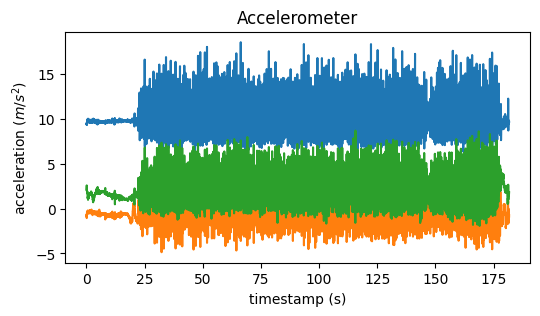

In [24]:
plt.plot(acc_df.ts, acc_df[["x", "y", "z"]], label=["x", "y", "z"])
plt.xlabel("timestamp (s)")
plt.ylabel("acceleration ($m/s^2$)")
plt.title("Accelerometer")
plt.show()

         ts  accuracy         x         y         z      norm
0  0.003125         3  9.433155 -0.861913  2.097321  9.701859
1  0.013075         3  9.452309 -0.871489  2.183512  9.740296
2  0.023024         3  9.442732 -0.881066  2.202666  9.736180
3  0.032974         3  9.433155 -0.871489  2.240973  9.734776
4  0.042923         3  9.500193 -0.852336  2.240973  9.798066


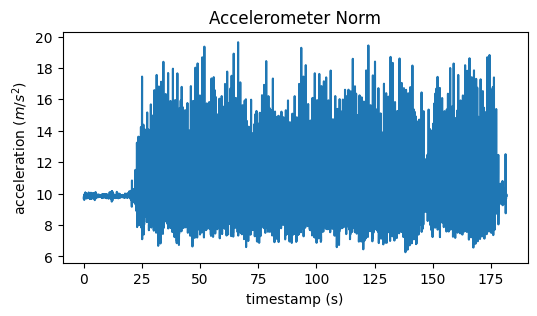

In [25]:
acc_df["norm"] = np.sqrt(acc_df["x"] ** 2 + acc_df["y"] ** 2 + acc_df["z"] ** 2)
acc_df.reset_index()

plt.plot(acc_df.ts, acc_df["norm"])
plt.xlabel("timestamp (s)")
plt.ylabel("acceleration ($m/s^2$)")
plt.title("Accelerometer Norm")
plt.show()

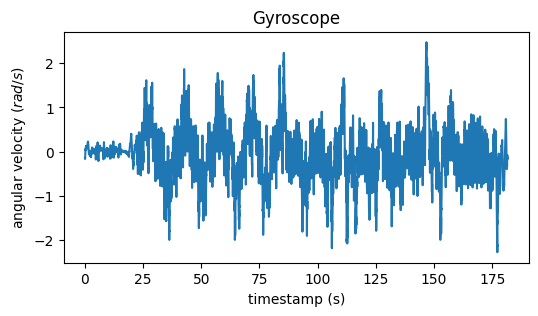

In [26]:
# ジャイロ
plt.plot(gyro_df.ts, gyro_df["x"])
plt.xlabel("timestamp (s)")
plt.ylabel("angular velocity ($rad/s$)")
plt.title("Gyroscope")
plt.show()

         ts         x         y         z
0  0.003125 -0.001436 -0.000373 -0.001008
1  0.013075 -0.002926 -0.000831 -0.002053
2  0.023024 -0.004423 -0.001350 -0.003122
3  0.032974 -0.005919 -0.001912 -0.004215
4  0.042923 -0.007404 -0.002505 -0.005333


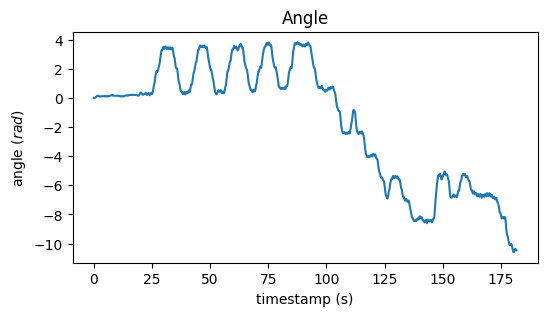

In [27]:
# 角速度を積分して角度に変換
angle_df = estimate.convert_to_angle_from_gyro(gyro_df)

print(angle_df.head())

# 角度のデータをplot
plt.plot(angle_df.ts, angle_df["x"])
plt.xlabel("timestamp (s)")
plt.ylabel("angle ($rad$)")
plt.title("Angle")
plt.show()

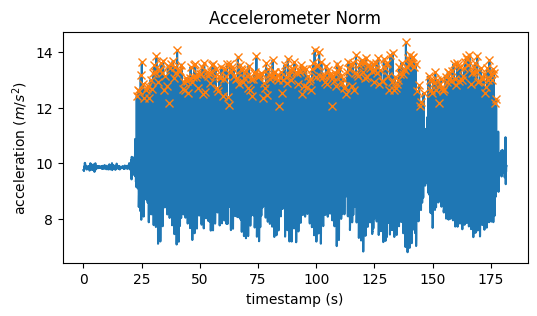

In [28]:
from scipy.signal import find_peaks

acc_df["norm"] = np.sqrt(acc_df["x"] ** 2 + acc_df["y"] ** 2 + acc_df["z"] ** 2)
acc_df["rolling_norm"] = acc_df["norm"].rolling(10).mean()

peaks, _ = find_peaks(acc_df["rolling_norm"], height=12, distance=10)

plt.plot(acc_df.ts, acc_df["rolling_norm"])
plt.plot(acc_df.ts[peaks], acc_df["rolling_norm"][peaks], "x")
plt.xlabel("timestamp (s)")
plt.ylabel("acceleration ($m/s^2$)")
plt.title("Accelerometer Norm")
plt.show()